In [1]:
# Imports

from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import tools
import basilarmembrane
from scipy import signal
import seaborn as sns
import IHC


In [2]:
# Load Data

samplerate, data = wavfile.read('audio.wav')

# Discard single channel as we model only one ear in this case
audio = np.array(data[:, 0], dtype=float)
# Signal length in samples
nt = len(audio)

print("Sample rate of audio data: {}".format(samplerate))
print("Length of signal: {} samples".format(nt))
print("Temporal signal duration: {} seconds ({} minutes and {} seconds)"
      .format(nt/samplerate, int((nt/samplerate)//60), (nt/samplerate)%60))

Sample rate of audio data: 44100
Length of signal: 14538287 samples
Temporal signal duration: 329.6663718820862 seconds (5 minutes and 29.666371882086196 seconds)


In [3]:
#Rescale signal between -1 and 1
audio = tools.rescale(audio, -1, 1)


-32768.0 32099.0


Text(0.5, 1.0, 'Dave Brubeck - Take Five')

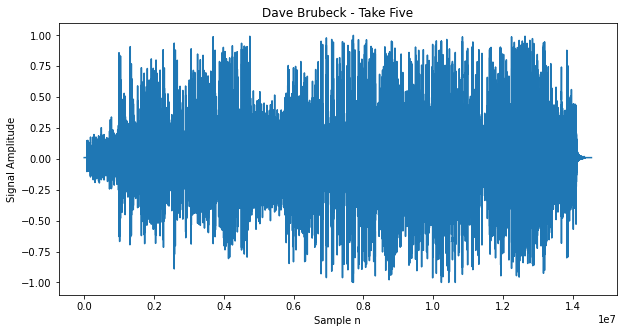

In [4]:
# Plot signal in the time domain
plt.figure(figsize=(10, 5))
plt.plot(audio)
plt.xlabel('Sample n')
plt.ylabel('Signal Amplitude')
plt.title('Dave Brubeck - Take Five')

Text(0, 0.5, 'Magnitude')

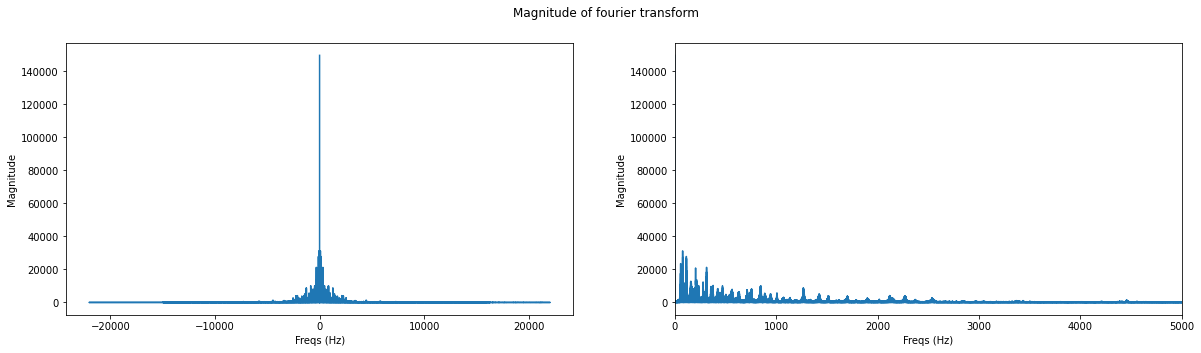

In [5]:
# Plot signal in the fourier domain
audio_fft = np.fft.fft(audio)
audio_fft_freqs = np.fft.fftfreq(nt, 1/samplerate)

plt.figure(figsize=(20, 5))
plt.suptitle('Magnitude of fourier transform')
plt.subplot(1, 2, 1)
plt.plot(audio_fft_freqs, np.abs(audio_fft))
plt.xlabel('Freqs (Hz)')
plt.ylabel('Magnitude')


plt.subplot(1, 2, 2)
plt.plot(audio_fft_freqs, np.abs(audio_fft))
plt.xlim(0, 5000)
plt.xlabel('Freqs (Hz)')
plt.ylabel('Magnitude')

C:\Users\richa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency (hZ)')

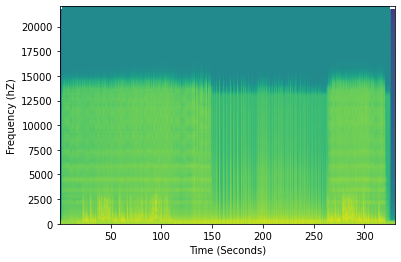

In [6]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(audio, Fs=samplerate)
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency (hZ)')

 

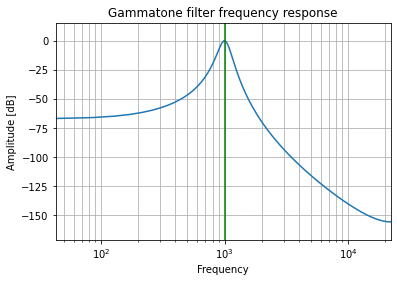

In [7]:
# Visualise single gammatone filter
ffilt = 1000
gammatone1000 = basilarmembrane.gammatone(ffilt, samplerate)
w, h = signal.freqz(gammatone1000.b, gammatone1000.a, fs=samplerate)

plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Gammatone filter frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ffilt, color='green') # cutoff frequency
plt.show()

Filter 0 at 200.00519354149583Hz:
Filter Numerator Coefficients: [ 4.02417747e-09 -1.59824070e-08  2.37840344e-08 -1.57178267e-08
  3.89202337e-09]
Filter Denominator Coefficients: [  1.          -7.94319192  27.60695914 -54.83456802  68.08017657
 -54.10249161  26.87473881  -7.62928037   0.9476574 ]

Filter 1 at 325.9265109906737Hz:
Filter Numerator Coefficients: [ 1.12266712e-08 -4.44699873e-08  6.59136581e-08 -4.33267724e-08
  1.06564672e-08]
Filter Denominator Coefficients: [  1.          -7.92220355  27.4665434  -54.43244014  67.44121345
 -53.494195    26.52782926  -7.51956219   0.93281476]

Filter 2 at 484.48242411908905Hz:
Filter Numerator Coefficients: [ 3.05363017e-08 -1.20499789e-07  1.77462476e-07 -1.15593457e-07
  2.80949754e-08]
Filter Denominator Coefficients: [  1.          -7.89223202  27.26931324 -53.87736605  66.5754353
 -52.68621668  26.07687325  -7.38026265   0.91445562]

Filter 3 at 685.0742169193891Hz:
Filter Numerator Coefficients: [ 8.17672584e-08 -3.20883591e-07

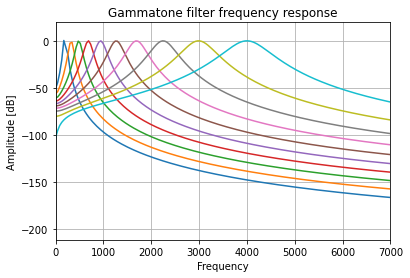

In [8]:
# Calculate locations of gammatones in bank

flims = [200, 4000]
nfilt = 10
filterbank = basilarmembrane.filterbank('gammatone', flims, nfilt, samplerate)

#Print filter coefficients
for i, (floc, filt) in enumerate(filterbank.bands.items()):
    print("Filter {} at {}Hz:".format(i, floc))
    print("Filter Numerator Coefficients: {}".format(filt['filter'].b))
    print("Filter Denominator Coefficients: {}".format(filt['filter'].a))
    print("")
    
#Plot filters
filterbank.visualise_filters()


In [9]:
# Filter signal using each band in filterbank (basilar membrane stage 1)
filterbank.filter_bm(audio)

In [10]:
# Filter each band using IHC lowpass and half wave rectification (IHC stage 2)
sig_ihc = filterbank.filter_ihc()

[4.15029943e-11 2.06336119e-10 6.15160303e-10 ... 3.04736140e-05
 3.04836403e-05 3.04934392e-05]
[2.76433932e-12 1.89036149e-11 7.11018450e-11 ... 3.03937274e-05
 3.04050371e-05 3.04161606e-05]

[1.15785269e-10 5.74422503e-10 1.70741353e-09 ... 1.59124764e-05
 1.59126453e-05 1.59128130e-05]
[7.71196818e-12 5.26564721e-11 1.97625491e-10 ... 1.59113521e-05
 1.59115131e-05 1.59116751e-05]

[3.14933415e-10 1.55769721e-09 4.60810282e-09 ... 9.58283197e-06
 9.58283794e-06 9.58284594e-06]
[2.09763858e-11 1.42910112e-10 5.34550755e-10 ... 9.58288575e-06
 9.58287899e-06 9.58287405e-06]

[8.43299303e-10 4.15270351e-09 1.21919224e-08 ... 6.53980482e-06
 6.53980281e-06 6.53980082e-06]
[5.61686081e-11 3.81448965e-10 1.41928211e-09 ... 6.53981253e-06
 6.53981137e-06 6.53981010e-06]

[2.24111389e-09 1.09639355e-08 3.17976872e-08 ... 4.80375307e-06
 4.80375266e-06 4.80375225e-06]
[1.49271139e-10 1.00891912e-09 3.72269067e-09 ... 4.80375474e-06
 4.80375449e-06 4.80375422e-06]

[5.95494043e-09 2.8844038